In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import numpy as np
import tensorflow.keras as tk
mnist = tk.datasets.mnist
np.random.seed(0)

In [3]:
img_rows = 28
img_cols = 28

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

input_shape = (img_rows, img_cols ,1)
x_train = x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
x_test = x_test.reshape(x_test.shape[0],img_rows, img_cols,1)

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
#x데이터 정규화
x_train = x_train.astype('float32')/ 255.
x_test = x_test.astype('float32') / 255.

print('x_train_shape:',x_train.shape)
print(x_train.shape[0],'train samples')
print(x_test.shape[0],'test samples')

num_classes = 10

#y데이터 keras.utils.to_categorical 통해 onehot벡터로 변경
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train_shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [5]:
#model build
model = Sequential()
model.add(Conv2D(32,kernel_size=(5,5),strides=(1,1),padding ='same',activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(64,(2,2),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1000,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes,activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0

In [6]:
#모델학습, 평가
hist = model.fit(x_train,y_train, batch_size = 128,epochs=12,validation_data=(x_test,y_test))

score = model.evaluate(x_test,y_test)
print("test loss:", score[0])
print("test accuracy:",score[1])

Epoch 1/12
469/469 [==============================] - 94s 199ms/step - loss: 0.1696 - accuracy: 0.9477 - val_loss: 0.0446 - val_accuracy: 0.9854
Epoch 2/12
469/469 [==============================] - 96s 205ms/step - loss: 0.0529 - accuracy: 0.9834 - val_loss: 0.0301 - val_accuracy: 0.9915
Epoch 3/12
469/469 [==============================] - 96s 204ms/step - loss: 0.0369 - accuracy: 0.9884 - val_loss: 0.0316 - val_accuracy: 0.9888
Epoch 4/12
469/469 [==============================] - 92s 197ms/step - loss: 0.0300 - accuracy: 0.9906 - val_loss: 0.0271 - val_accuracy: 0.9914
Epoch 5/12
469/469 [==============================] - 92s 197ms/step - loss: 0.0249 - accuracy: 0.9917 - val_loss: 0.0268 - val_accuracy: 0.9922
Epoch 6/12
469/469 [==============================] - 94s 201ms/step - loss: 0.0221 - accuracy: 0.9930 - val_loss: 0.0234 - val_accuracy: 0.9918
Epoch 7/12
469/469 [==============================] - 92s 196ms/step - loss: 0.0165 - accuracy: 0.9945 - val_loss: 0.0266 - val_ac

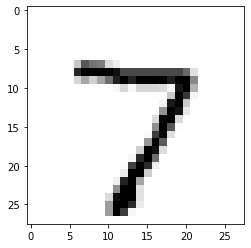

1/1 [==============================] - 0s 219ms/step
The answer is [7]


In [11]:
#test데이터 중 하나로 예측
import matplotlib.pyplot as plt

n=0
plt.imshow(x_test[n].reshape(28,28),cmap='Greys',interpolation='nearest')
plt.show()

#tensorflow 2.6이후 predict_classes 사용 x -> 아래 처럼 사용
predict_x = model.predict(x_test[n].reshape((1,28,28,1))) 
classes_x = np.argmax(predict_x,axis=1)

print("The answer is",classes_x) 